In [1]:
import pandas as pd
import pathlib
import seaborn as sns
import cufflinks as cf
import requests

### Download the data from gov.uk

In [2]:
cases_path = pathlib.Path("data", "coronavirus-cases_latest.csv")
death_path = pathlib.Path("data", "coronavirus-deaths_latest.csv")

In [3]:
cases_file = requests.get("https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv")
with cases_path.open("wb") as p:
    p.write(cases_file.content)

In [4]:
deaths_file = requests.get("https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv")
with death_path.open("wb") as p:
    p.write(deaths_file.content)

# Cumulative vs new cases

We plot on a log-log scale so that the drop off is more apparent

In [5]:
covid_data = pd.read_csv(cases_path)
covid_data["Specimen date"] = pd.to_datetime(covid_data["Specimen date"])

In [6]:
covid_data.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-05-12,81.0,0.0,81.0,139086,137940.0,1146.0,248.5
1,South West,E12000009,Region,2020-05-12,1.0,NaN,NaN,7155,NaN,NaN,127.8
2,South East,E12000008,Region,2020-05-12,11.0,NaN,NaN,19606,NaN,NaN,214.7
3,London,E12000007,Region,2020-05-12,0.0,NaN,NaN,26024,NaN,NaN,292.1
4,East of England,E12000006,Region,2020-05-12,2.0,NaN,NaN,12564,NaN,NaN,202.6


In [7]:
region_data = covid_data[covid_data["Area type"] == "Region"]
n_days=5

In [8]:
region_data = (region_data
 .sort_values(by=["Specimen date"])
     .set_index(["Specimen date"])
 .groupby(["Area name"])
     ["Daily lab-confirmed cases"]
 .rolling(3)
 .mean()
 .reset_index()
#  .drop(["level_1"], axis=1)
 .rename(columns={
      "Daily lab-confirmed cases" : f"Daily lab-confirmed cases ({n_days} day average)"
  })
  .merge(region_data)
)
region_data = region_data[~ pd.isna(region_data[f"Daily lab-confirmed cases ({n_days} day average)"])]

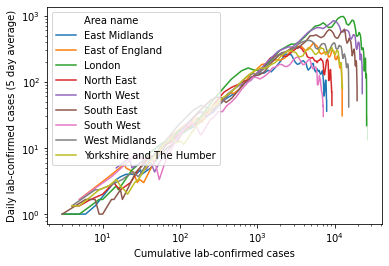

In [10]:
p = sns.lineplot(y=f"Daily lab-confirmed cases ({n_days} day average)",
             x="Cumulative lab-confirmed cases", 
             hue="Area name", 
             data=region_data, 
             sort=False)
p.set_yscale("log")
p.set_xscale("log")


# Cumulative vs new deaths

In [11]:
covid_deaths = pd.read_csv(pathlib.Path("data", "coronavirus-deaths_latest.csv"))
region_deaths = covid_deaths[covid_deaths["Area type"] == "Nation"]
region_deaths = (region_deaths
 .sort_values(by=["Reporting date"])
     .set_index(["Reporting date"])
 .groupby(["Area name"])
     ["Daily change in deaths"]
 .rolling(3)
 .mean()
 .reset_index()
#  .drop(["level_1"], axis=1)
 .rename(columns={
      "Daily change in deaths" : f"New deaths ({n_days} day average)"
  })
  .merge(region_deaths)
)
region_deaths = region_deaths[~ pd.isna(region_deaths[f"New deaths ({n_days} day average)"])]

In [12]:
region_deaths.head()

,Area name,Reporting date,New deaths (5 day average),Area code,Area type,Daily change in deaths,Cumulative deaths
3,England,2020-03-09,0.666667,E92000001,Nation,1.0,3
4,England,2020-03-10,1.666667,E92000001,Nation,4.0,7
5,England,2020-03-11,1.666667,E92000001,Nation,0.0,7
6,England,2020-03-12,2.000000,E92000001,Nation,2.0,9
7,England,2020-03-13,1.000000,E92000001,Nation,1.0,10


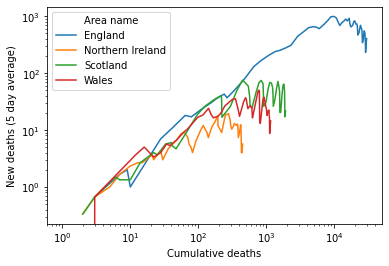

In [13]:
p = sns.lineplot(y=f"New deaths ({n_days} day average)",
             x="Cumulative deaths", 
             hue="Area name", 
             data=region_deaths, 
             sort=False)
p.set_yscale("log")
p.set_xscale("log")


[{'Area name': 'Wales',
  'Area code': 'W92000004',
  'Area type': 'Nation',
  'Reporting date': '2020-05-13',
  'Daily change in deaths': 22.0,
  'Cumulative deaths': 1154},
 {'Area name': 'Scotland',
  'Area code': 'S92000003',
  'Area type': 'Nation',
  'Reporting date': '2020-05-13',
  'Daily change in deaths': 50.0,
  'Cumulative deaths': 1912},
 {'Area name': 'Northern Ireland',
  'Area code': 'N92000002',
  'Area type': 'Nation',
  'Reporting date': '2020-05-13',
  'Daily change in deaths': 9.0,
  'Cumulative deaths': 447},
 {'Area name': 'United Kingdom',
  'Area code': 'K02000001',
  'Area type': 'UK',
  'Reporting date': '2020-05-13',
  'Daily change in deaths': 494.0,
  'Cumulative deaths': 33186},
 {'Area name': 'England',
  'Area code': 'E92000001',
  'Area type': 'Nation',
  'Reporting date': '2020-05-13',
  'Daily change in deaths': 413.0,
  'Cumulative deaths': 29673},
 {'Area name': 'Wales',
  'Area code': 'W92000004',
  'Area type': 'Nation',
  'Reporting date': '2020